In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
고객 기본정보 관련 변수(10)

#ID
#Year_Birth

Education: 교육 수준
Marital_Status: 혼인 상태
Income: 연간 소득
Kidhome: 아동 자녀 수
Teenhome: 10대 자녀 수
# Dt_Customer: 최초 고객등록일
Recency: 현재일 - 최근 구매일
Complain: 최근 2년간 클레임이 있었다면 1, 아니면 0

제품 관련 변수(6): 최근 2년간 구매금액

MntWines: 와인
MntFruits: 과일
MntMeatProducts: 육류
MntFishProducts: 생선류
MntSweetProducts: 과자류
MntGoldProds: gold(?)

프로모션 관련 변수(7)

NumDealsPurchases: 할인받아 구매한 수
AcceptedCmp1: 1번째 캠페인에서 구매를 이끌어냈다면 1, 아니면 0
AcceptedCmp2: 2번째 캠페인에서 구매를 이끌어냈다면 1, 아니면 0
AcceptedCmp3: 3번째 캠페인에서 구매를 이끌어냈다면 1, 아니면 0
AcceptedCmp4: 4번째 캠페인에서 구매를 이끌어냈다면 1, 아니면 0
AcceptedCmp5: 5번째 캠페인에서 구매를 이끌어냈다면 1, 아니면 0
Response: 마지막 캠페인에서 구매를 이끌어냈다면 1, 아니면 0

구매 장소 관련 변수(4)

NumWebPurchases: 회사 웹사이트에서 구매한 횟수
NumCatalogPurchases: 카탈로그를 통하여 구매한 횟수
NumStorePurchases: 매장에서 직접 구매한 횟수
NumWebVisitMonth: 지난 달 웹사이트 방문 횟수

In [ ]:
import pandas as pd

In [ ]:
pwd!

'/content'

In [ ]:
data = pd.read_csv("./drive/MyDrive/data/marketing_campaign.csv", sep = '\t') # sep 인

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### np.NA 처리

In [ ]:
data.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [ ]:
#Income 변수에 24개의 결측치가 존재: 비중이 1% 정도이므로 해당 행 삭제
data = data.dropna()

### 수치형 변수

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
data['AcceptedCmp2'].value_counts() 
# std를 보아 AcceptedCmp1~5까지 BINARY 값을 가짐.

0    2186
1      30
Name: AcceptedCmp2, dtype: int64

In [ ]:
#std 분산 확인
table  = data.describe()
table.iloc[2]

ID                      3249.376275
Year_Birth                11.985554
Income                 25173.076661
Kidhome                    0.536896
Teenhome                   0.544181
Recency                   28.948352
MntWines                 337.327920
MntFruits                 39.793917
MntMeatProducts          224.283273
MntFishProducts           54.752082
MntSweetProducts          41.072046
MntGoldProds              51.815414
NumDealsPurchases          1.923716
NumWebPurchases            2.740951
NumCatalogPurchases        2.926734
NumStorePurchases          3.250785
NumWebVisitsMonth          2.425359
AcceptedCmp3               0.261106
AcceptedCmp4               0.261842
AcceptedCmp5               0.260367
AcceptedCmp1               0.244950
AcceptedCmp2               0.115588
Complain                   0.096907
Z_CostContact              0.000000
Z_Revenue                  0.000000
Response                   0.357417
Name: std, dtype: float64

In [ ]:
# 똑같은 값만 가진 컬럼 제외
data=data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

### 날짜형 변수 EX) 생일, 등

In [ ]:
print(data.iloc[1]) #Dt_Customer            08-03-2014 날짜로 변경해줘야함

ID                           2174
Year_Birth                   1954
Education              Graduation
Marital_Status             Single
Income                    46344.0
Kidhome                         1
Teenhome                        1
Dt_Customer            08-03-2014
Recency                        38
MntWines                       11
MntFruits                       1
MntMeatProducts                 6
MntFishProducts                 2
MntSweetProducts                1
MntGoldProds                    6
NumDealsPurchases               2
NumWebPurchases                 1
NumCatalogPurchases             1
NumStorePurchases               2
NumWebVisitsMonth               5
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 1, dtype

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

<ipython-input-9-c1db19e08176>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [ ]:
print(data['Dt_Customer'].max(), data['Dt_Customer'].min())

2014-12-06 00:00:00 2012-01-08 00:00:00


In [ ]:
### 오늘이 2015-01-01 이라고 가정


In [ ]:
data['days_Customer'] = data['Dt_Customer'].map(lambda x : (pd.to_datetime('2015-01-01') - x).days)

In [ ]:
data['Age'] = 2015- data['Year_Birth'] 

In [ ]:
data = data.drop(['Year_Birth','Dt_Customer'], axis=1)

In [ ]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'days_Customer', 'Age'],
      dtype='object')

In [ ]:
# 이상치나 관측치 체크
data.describe().iloc[:,:10]

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000


In [ ]:
data.describe().iloc[:,10:20]

,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079
std,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.describe().iloc[:,20:30]

,AcceptedCmp2,Complain,Response,Age,days_Customer
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.013538,0.009477,0.150271,46.179603,538.006318
std,0.115588,0.096907,0.357417,11.985554,232.469034
min,0.000000,0.000000,0.000000,19.000000,26.000000
25%,0.000000,0.000000,0.000000,38.000000,366.000000
50%,0.000000,0.000000,0.000000,45.000000,539.000000
75%,0.000000,0.000000,0.000000,56.000000,712.000000
max,1.000000,1.000000,1.000000,122.000000,1089.000000


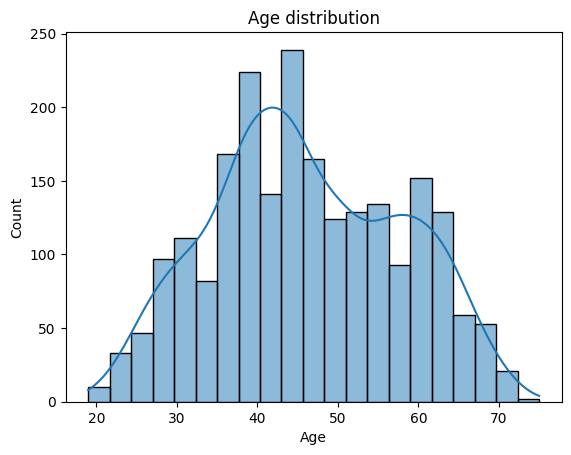

In [ ]:
import seaborn as sns
sns.histplot(data=data, x='Age', kde=True)
plt.title('Age distribution')
plt.show()

In [ ]:
data = data[~(data['Age'] > 100)]

Text(0.5, 1.0, 'MntMeatProducts distribution')

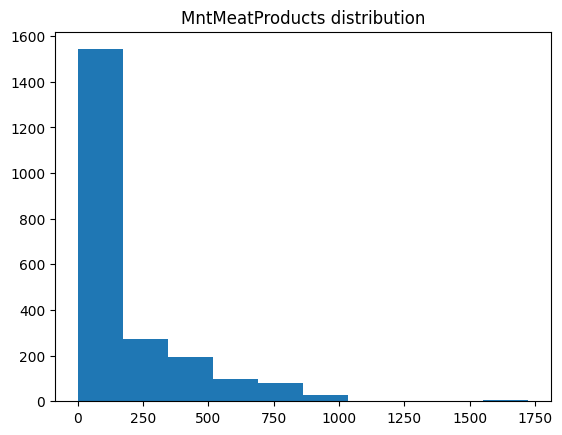

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['MntMeatProducts'].values)
plt.title("MntMeatProducts distribution")

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['Income'].values)
plt.title("Income distribution")

In [ ]:
q1 = data.Income.quantile(0.25)
q3 = data.Income.quantile(0.75)

upper_bound = q3 + 1.5*(q3-q1)
lower_bound= q1 - 1.5*(q3-q1)

print(upper_bound, len(data[data['Income']> upper_bound]), "건" )
print( lower_bound, len(data[data['Income']< lower_bound]), "건")

118348.5 8 건
-14615.5 0 건


In [ ]:
data.loc[data['Income'] > upper_bound, 'Income'] = upper_bound
data.loc[data['Income'] < lower_bound, 'Income'] = lower_bound

Text(0.5, 1.0, 'Income distribution after ')

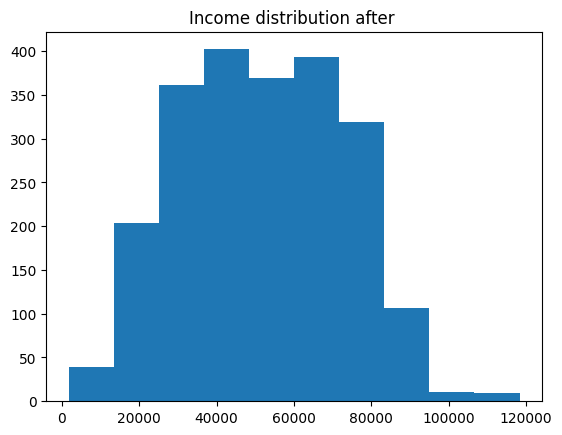

In [ ]:
#IQR 처리 후
import matplotlib.pyplot as plt
plt.hist(data['Income'].values)
plt.title("Income distribution after ")

### 범주형 변수

In [ ]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

### 데이터 재확인
- 여기서 꼭 데이터 복사본 만들어놓기

In [ ]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'days_Customer', 'Age'],
      dtype='object')

In [ ]:
data = data.drop([ 'ID'], axis=1)

In [ ]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'days_Customer', 'Age'],
      dtype='object')

In [ ]:
data.shape

(2213, 26)

In [ ]:
data.corr()

<ipython-input-101-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,days_Customer
Income,1.000000,-0.522639,0.036260,0.006428,0.706796,0.521496,0.691898,0.534326,0.537877,0.400674,...,-0.652123,-0.014206,0.225734,0.405518,0.335898,0.106852,-0.028080,0.166832,0.204957,-0.028517
Kidhome,-0.522639,1.000000,-0.039485,0.010196,-0.497407,-0.373305,-0.439192,-0.388777,-0.378014,-0.355095,...,0.447273,0.015999,-0.162201,-0.204660,-0.174339,-0.081946,0.037013,-0.078076,-0.237738,-0.057397
Teenhome,0.036260,-0.039485,1.000000,0.014764,0.004312,-0.175736,-0.260778,-0.204954,-0.162794,-0.018315,...,0.130839,-0.042669,0.038279,-0.189961,-0.145058,-0.015580,0.007784,-0.154189,0.362112,0.008702
Recency,0.006428,0.010196,0.014764,1.000000,0.016332,-0.005129,0.023177,0.001007,0.025495,0.018394,...,-0.019075,-0.032240,0.017631,0.000347,-0.021036,-0.001382,0.005750,-0.199899,0.015971,0.030467
MntWines,0.706796,-0.497407,0.004312,0.016332,1.000000,0.385892,0.568189,0.397035,0.389731,0.391604,...,-0.321666,0.061460,0.373389,0.472909,0.351647,0.206319,-0.036376,0.246434,0.164843,0.148438
MntFruits,0.521496,-0.373305,-0.175736,-0.005129,0.385892,1.000000,0.546767,0.593062,0.571498,0.393503,...,-0.417764,0.014683,0.006638,0.209021,0.192446,-0.009907,-0.002942,0.123059,0.013542,0.059727
MntMeatProducts,0.691898,-0.439192,-0.260778,0.023177,0.568189,0.546767,1.000000,0.573054,0.534713,0.357675,...,-0.539214,0.018498,0.091751,0.375293,0.313422,0.043580,-0.020986,0.238059,0.033823,0.071165
MntFishProducts,0.534326,-0.388777,-0.204954,0.001007,0.397035,0.593062,0.573054,1.000000,0.583548,0.426385,...,-0.446182,-0.000207,0.016126,0.194845,0.261755,0.002351,-0.019074,0.108227,0.041316,0.077865
MntSweetProducts,0.537877,-0.378014,-0.162794,0.025495,0.389731,0.571498,0.534713,0.583548,1.000000,0.356868,...,-0.422323,0.001741,0.029284,0.258469,0.245162,0.010175,-0.020540,0.116165,0.021710,0.076139
MntGoldProds,0.400674,-0.355095,-0.018315,0.018394,0.391604,0.393503,0.357675,0.426385,0.356868,1.000000,...,-0.246025,0.125623,0.024381,0.176688,0.170908,0.051004,-0.030137,0.141196,0.059960,0.145417


### 수치형 스케일링 및 라벨인코더


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
data2 = data.copy()
# data = data2.copy()

In [ ]:
column_list = data.columns.tolist()
obj_list = []
for col, type in zip(data.columns, data.dtypes) :
  if type == "object" :
    obj_list.append(col)
obj_list

['Education', 'Marital_Status']

In [ ]:

#get_dummies 진행
# train_dummy = pd.get_dummies(train, columns = ['store_and_fwd_flag'], drop_first=True)

# labelencoding
le=LabelEncoder()

for i in obj_list : 
  data[i] = data[[i]].apply(le.fit_transform)

data[obj_list].head(2)

,Education,Marital_Status
0,2,4
1,2,4


In [ ]:
# 군집분석은 train,valid 안나누고 전체 데이터셋을 scale 화 함

for obj in obj_list :
  column_list.remove(obj)

In [ ]:
ss = StandardScaler()
for col in column_list : 
  data[col] = ss.fit_transform(data[[col]])

In [ ]:
display(data.shape, data.head(3))

(2213, 26)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,days_Customer,Age
0,2,4,0.298011,-0.823208,-0.929307,0.310773,0.978107,1.552498,1.690807,2.454109,...,0.692198,-0.281979,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,2.376057,1.973525,1.018785
1,2,4,-0.262135,1.039532,0.908545,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,...,-0.132699,-0.281979,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,-0.420865,-1.665655,1.275248
2,2,5,0.937994,-0.823208,-0.929307,-0.795142,0.358351,0.570796,-0.178264,1.339972,...,-0.545148,-0.281979,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,-0.420865,-0.172989,0.334882


### PCA

In [ ]:
주성분 분석(PCA)은 머신러닝의 비지도학습기법 중 하나로 고차원의 데이터를 저차원으로 축소합니다. 
기존 변수의 선형 조합으로 생성된 요약된 변수(주성분)로 데이터를 요약하는 것으로, 원 데이터의 분산을 최대로 보존하는 축을 찾고 그 축에 데이터를 사영(projection)시키는 기법입니다.

PCA의 장점
1. 차원의 저주
2. 변수간 다중공선성
3. 시각화 표현

PCA 와 K-Means Clustering의 결합 차원을 축소한 데이터를 이용하여 머신러닝 알고리즘을 수행하면 연산 cost를 줄일 수 있고, 
거리를 기반으로 하는 머신러닝 기법(K-Means Clustering, KNN 등)은 데이터의 분포나 변수 간 상관관계에 영향을 많이 받게 되는 점을 고려하면 
클러스터링 분석 시 PCA를 사용하는 것은 합리적이라고 할 수 있습니다.

In [ ]:
pca.explained_variance_ratio_.sum() #주성분별 분산 설명률
pca.components_ #공통성 
pca.explained_variance_ #고유값

##### 1) 주성분별 고유값 코드

In [ ]:
# pca 하기 전에 스케일 조정을 해주는게 필수인지.?

In [ ]:
import copy
data_scaled = copy.deepcopy(data)

In [ ]:
from sklearn.decomposition import PCA
variance_ratio={}

for i in range(1, len(data_scaled.columns)+1):
  pca = PCA(n_components = i)
  pca.fit(data_scaled)
  variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum() #주성분의 갯수에 따른 분산 설명률

In [ ]:
variance_ratio

{'n_1': 0.2558668564866066,
 'n_2': 0.3382290532323493,
 'n_3': 0.4114787280552865,
 'n_4': 0.47547816003556304,
 'n_5': 0.5230227106911552,
 'n_6': 0.567138856179778,
 'n_7': 0.60706982607057,
 'n_8': 0.645359973833931,
 'n_9': 0.6833378712263872,
 'n_10': 0.7162111167644262,
 'n_11': 0.7476389547009652,
 'n_12': 0.7754608148937506,
 'n_13': 0.8008098496074888,
 'n_14': 0.8239981043397142,
 'n_15': 0.846242357608607,
 'n_16': 0.8679276348923498,
 'n_17': 0.8875982482206567,
 'n_18': 0.9068148479359168,
 'n_19': 0.9229663939002912,
 'n_20': 0.9386221562641377,
 'n_21': 0.953177521332972,
 'n_22': 0.9671040916410752,
 'n_23': 0.9778921765917347,
 'n_24': 0.9867763804385074,
 'n_25': 0.9944044244410825,
 'n_26': 1.0}

In [ ]:
#공통성 , 각 주성분의 생성에 변수들이 얼마만큼 기여했는지를 나타내는 계수입니다
#eigenvector per each PC
data_pca5 = pd.DataFrame(pca.components_[0:5],
                         columns = data_scaled.columns,
                         index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']).T

data_pca5
#첫번째 주성분의 경우 NumCatalogPurchases MntMeatProducts 주성분 생성에 가장 크게 기여했습니다.

,PC1,PC2,PC3,PC4,PC5
Education,0.023347,0.306676,0.157425,-0.418217,-0.505843
Marital_Status,0.009176,0.007389,-0.026825,-0.074068,0.268006
Income,0.334595,0.066659,-0.030426,-0.156872,-0.019207
Kidhome,-0.251878,-0.066928,0.099375,0.133838,-0.039892
Teenhome,-0.051029,0.477497,-0.166473,-0.099263,0.039599
Recency,0.001648,0.008795,-0.111192,-0.059784,0.321654
MntWines,0.303739,0.208541,0.145712,-0.008449,0.039777
MntFruits,0.260329,-0.154801,-0.172873,0.109409,-0.047087
MntMeatProducts,0.308864,-0.120419,-0.013545,0.003410,-0.085428
MntFishProducts,0.270265,-0.167724,-0.172003,0.110196,0.001882


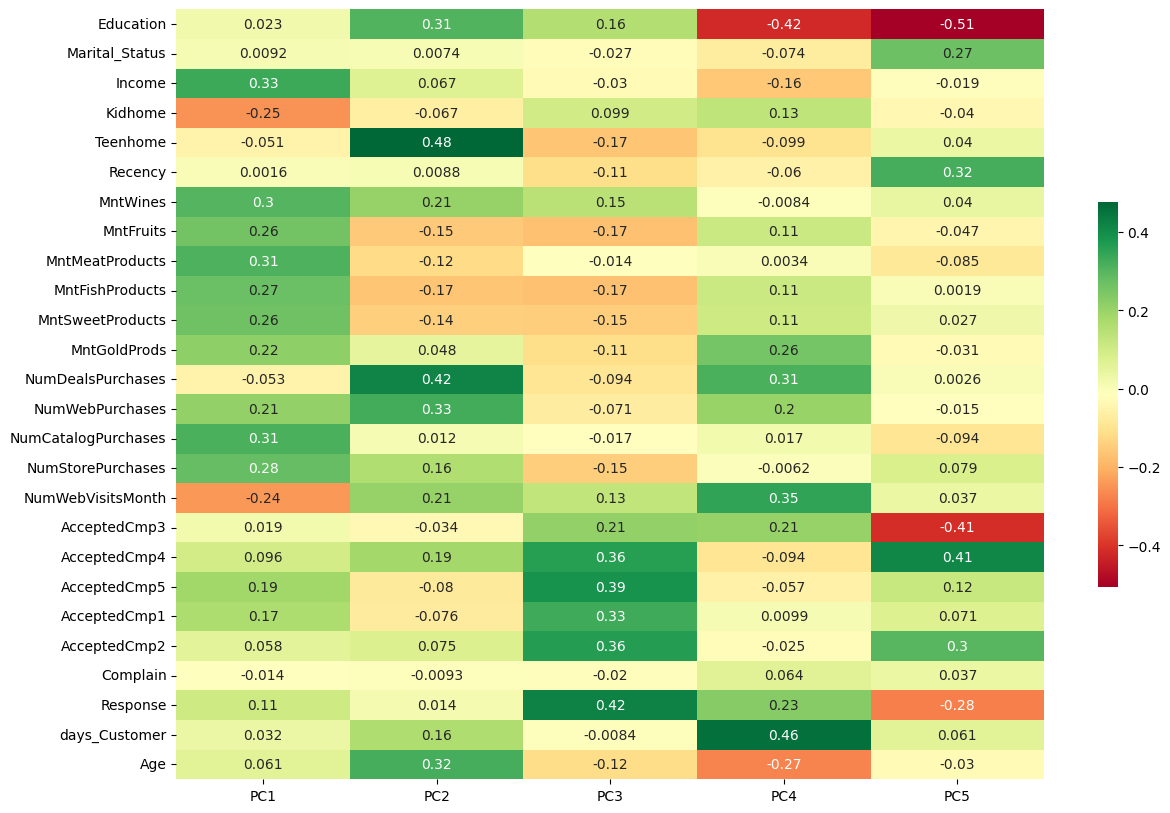

In [ ]:
# heatmap for each loading(value of the elements of eigenvector against each principal component.)
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(data_pca5, 
            annot=True,
            cmap = 'RdYlGn',
            cbar_kws = {'shrink' : 0.5})
plt.show()

##### 2) n_components 구하는 방법
- 3가지 : 가. he Scree plot을 이용한 선택법(Elbow method) 나. Kaiser''s Rule 다. 분산비율 선택법

In [ ]:
he Scree plot을 이용한 선택법(Elbow method): 주성분이 늘어감에 따라 고유값(eigen value)이 유의미하게 감소하는 elbow point에 해당하는 주성분 수를 선택 
--> 사용자가 주관적으로 선택한다는 단점이 있으므로, 아래의 방법들과 함께 사용하였습니다.

Kaiser''s Rule: PCA().fit(your data)을 통해 데이터의 차원 축소를 수행한 뒤, .explained_variance_ 속성을 이용하여 각 주성분의 고유값(eigen value)을 알 수 있습니다. 
카이저 규칙은, 고유값이 1을 초과하는 주성분들만 선택하는 방식인데, 요인의 수를 고려하지 않는 지나치게 엄격한 관습적인 방법으로 인해 1번과 3번의 방법과 함께 참고로만 사용하는 것을 권장하고 있습니다.

분산비율 선택법: 전체 데이터에서 최소 70% 이상의 설명력을 가지는 주성분 갯수를 선택하는 방법입니다.

In [ ]:
eigen_value

array([6.76278405, 2.17690471, 1.93617101, 1.69163874, 1.25693689,
       1.16623238, 1.05642685, 1.01119067, 1.00362981, 0.86827987,
       0.83118629, 0.73482555, 0.67007325, 0.61271682, 0.58793328,
       0.57315376, 0.51991146, 0.50791148, 0.42689944, 0.41379545,
       0.38471099, 0.36809139, 0.28513849, 0.23481725, 0.20161585,
       0.14789594])

In [ ]:
pca.explained_variance_

array([6.76278405, 2.17689965, 1.93616387, 1.69157458, 1.25626921])

<ipython-input-37-0ba084ea912a>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,10,1)


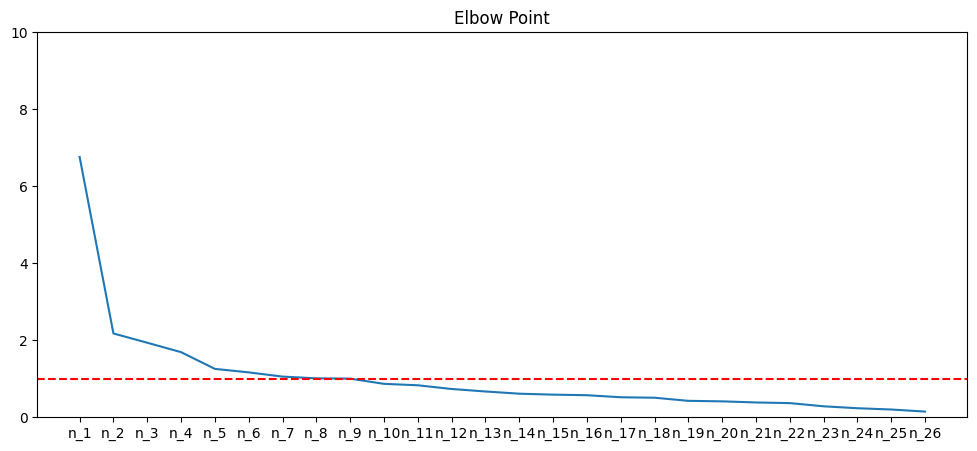

In [ ]:
# eigen value
import numpy as np

eigen_value = np.sort(pca.explained_variance_)[::-1]
plt.figure(figsize=(12,5))
plt.plot(variance_ratio.keys(),eigen_value)
plt.ylim(0,10,1)
plt.axhline(1, color='red', ls='--')
plt.title('Elbow Point')

plt.show()

In [ ]:
print(f'the number of eigenvalue greater than one:', {len(eigen_value[eigen_value > 1])})

the number of eigenvalue greater than one: {9}


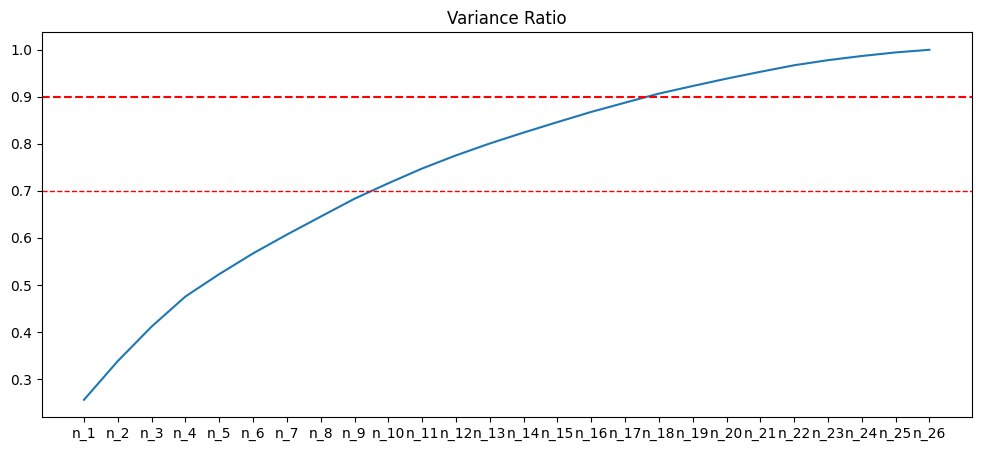

In [ ]:
# elblow 방법을 이용하면 주성분은 4개가 적절해 보이지만 카이저 규칙으로는 5개의 주성분이 적절합니다.

# 따라서 분산비율선택법도 함께 수행하여 선택의 근거를 추가하였습니다.

plt.figure(figsize=(12,5))
plt.plot(variance_ratio.keys(), variance_ratio.values())
plt.axhline(0.7, color='red', ls = '--', lw=1)
plt.axhline(0.9, color='red', ls = '--', lw=1.5)
plt.title("Variance Ratio")

plt.show()
# 이론적으로 분산비율은 적어도 70% 이상을 요구하고 있습니다. 
# 주성분 4개의 경우 거의 70%이기 때문에 확실히 70% 이상의 분산 설명력을 갖도록 5개의 주성분을 선택하는 것이 적절하다고 판단됩니다

##### n_components 선택 후 실제 적용

In [ ]:
pca = PCA(n_components=5, random_state=42)
pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled), columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2213.0,4.173997e-17,2.600535,-5.258589,-2.363333,-0.658682,2.098639,7.707175
PC2,2213.0,1.476953e-16,1.475433,-3.425997,-1.146156,-0.204301,1.043799,5.295073
PC3,2213.0,7.866379e-17,1.391463,-3.285644,-0.790003,-0.125568,0.438347,8.764007
PC4,2213.0,-8.990148e-17,1.300622,-3.988323,-0.879040,-0.042389,0.846677,5.421344
PC5,2213.0,-1.629464e-16,1.120996,-4.042147,-0.615456,0.027494,0.636726,5.701122


### K-means clustering
- k 설정방법 2가지 1) Elbow method 2) Silhouette methodLink

##### 1) 코드

In [ ]:
K-means clustering의 최적의 K값 결정
Elbow method: K값의 변화에 따른 Sum Sqaured Error의 추이 확인
Silhouette methodLink: K값 변화에 따른 실루엣 스코어 확인. 

사실상 Elbow method 와 실루엣 

In [ ]:
dir(stats)

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

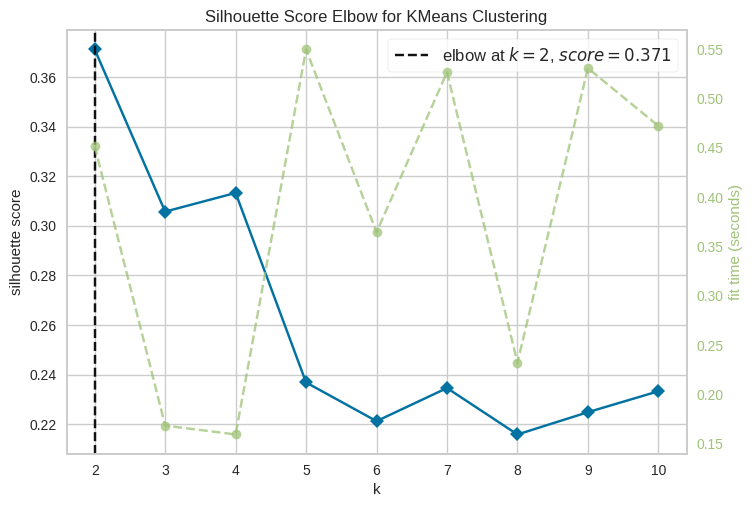

In [ ]:
# Silhouette method
# 실루엣 점수는 클러스터 내의 거리와 클러스터 간 거리를 동시에 고려하여 산출되며, 높을수록 좋습니다.
# 대개의 경우에 실루엣 점수가 두번째로 높은 것을 선택하는 것이 경험적으로 좋은 결과를 가져온다고 알려져 있습니다. 따라서 K-means의 K는 3으로 결정하도록 하겠습니다.

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans ()
Elbow_M = KElbowVisualizer(estimator= km, k=10, metric = 'silhouette')
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

In [ ]:
# k=4으로 클러스터링 수행

km = KMeans(n_clusters=4, random_state=42)
yhat_AC = km.fit_predict(data_pca)

data_pca["Clusters"] = yhat_AC # for evaluating the model
data["Clusters"] = yhat_AC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### 2) 시각화

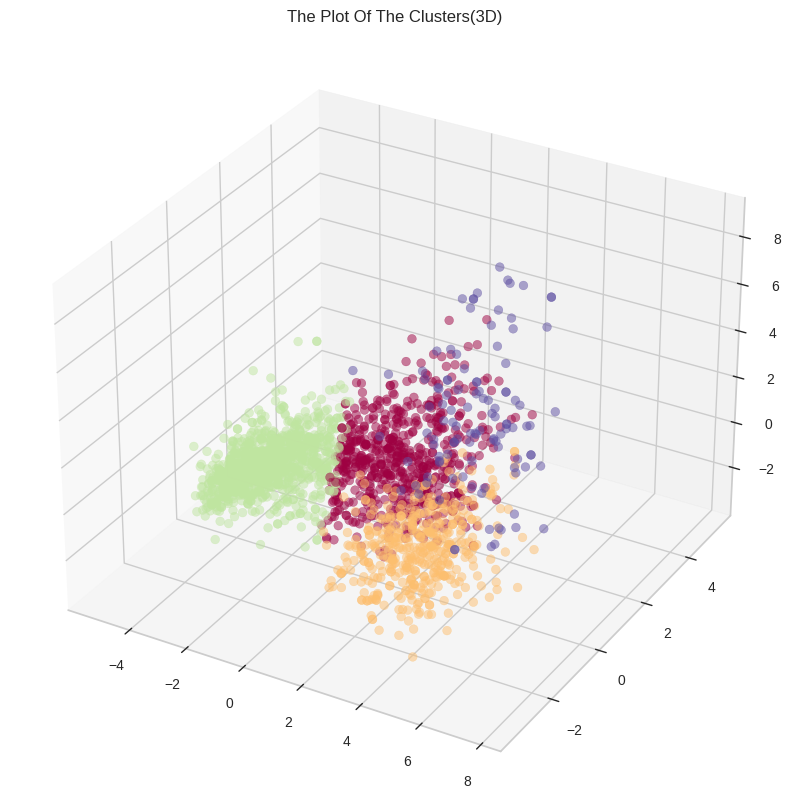

In [ ]:
# 3 dimension

x = data_pca["PC1"]
y = data_pca["PC2"]
z = data_pca["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z, s=40, c=data_pca["Clusters"], marker='o', alpha=0.5, cmap='Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

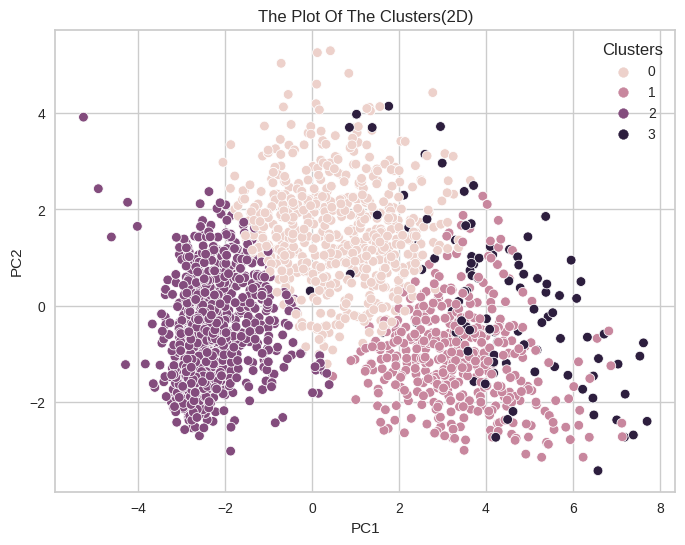

In [ ]:
# 2 dimension

plt.figure(figsize=(8,6))
sns.scatterplot(data=data_pca, x='PC1', y='PC2', hue='Clusters')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

### 고객 프로파일링

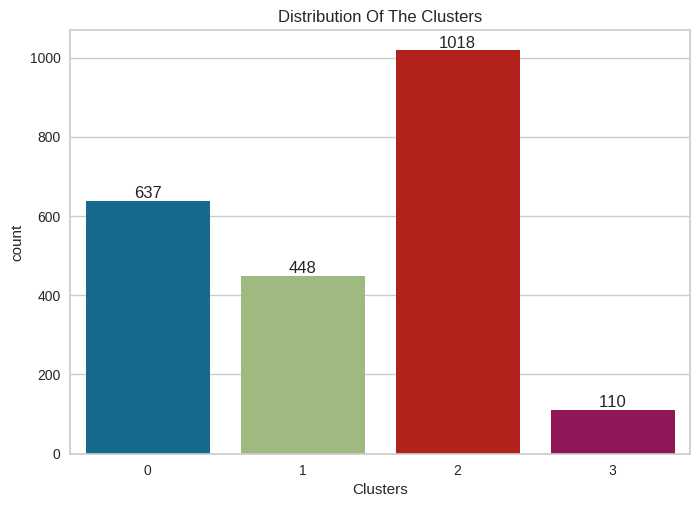

In [ ]:
# Plotting countplot of clusters

ax = sns.countplot(x=data["Clusters"])
ax.bar_label(ax.containers[0])
ax.set_title("Distribution Of The Clusters")
plt.show()

In [67]:
data['Income']

0       0.298011
1      -0.262135
2       0.937994
3      -1.197673
4       0.305372
          ...   
2235    0.444530
2236    0.577086
2237    0.243060
2238    0.825528
2239    0.047764
Name: Income, Length: 2213, dtype: float64

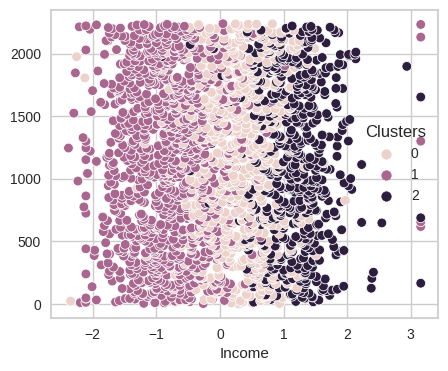

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x=data['Income'], y = data.index, hue= 'Clusters')
plt.show()